<a href="https://colab.research.google.com/github/Randoot/Computer-Vision/blob/main/Edge_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing with Scikit-Image
This notebook demonstrates basic image processing techniques using the `scikit-image` library. We'll perform edge detection, region filling, and watershed segmentation on an image.

%matplotlib inline sets the backend of matplotlib to the 'inline' backend:

With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import canny
from skimage import data, morphology
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.color import label2rgb
import scipy.ndimage as nd
#To set the figure size, you can use the figsize parameter when creating a new figure with plt.figure().
# The figsize parameter takes a tuple with two values: the width and the height of the figure in inches
plt.rcParams["figure.figsize"] = (12, 8)

#
%matplotlib inline

## Step 1: Load and Convert the Image to Grayscale
We'll start by loading an image of a rocket and convert it to grayscale.

Text(0.5, 1.0, 'Grayscale Image')

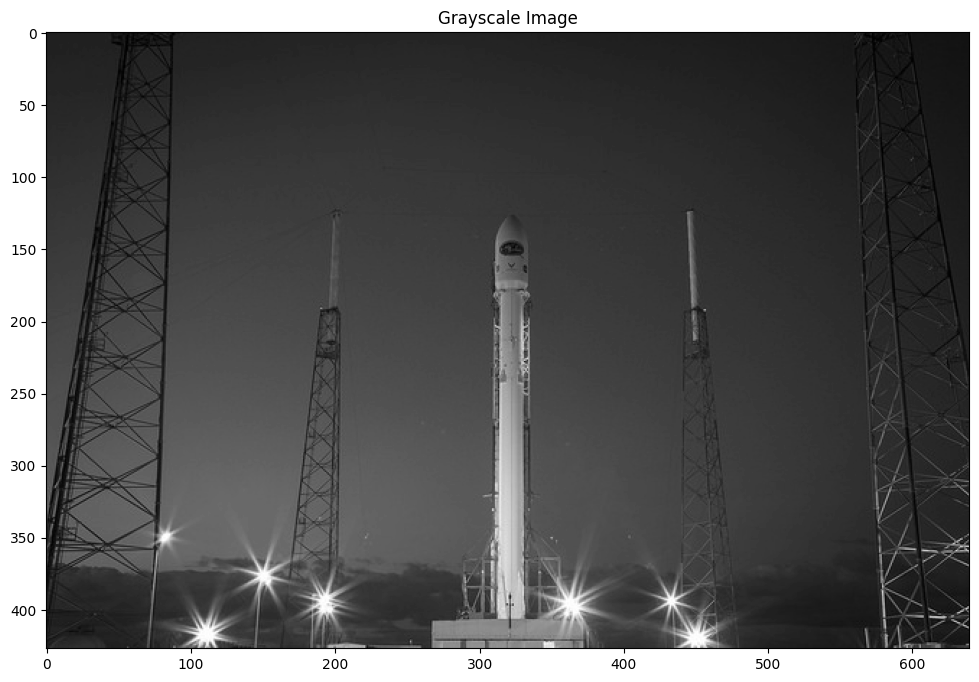

In [ ]:
# Load the image and convert to grayscale
rocket = data.rocket()
rocket_wh = rgb2gray(rocket)
plt.imshow(rocket_wh, cmap='gray')
plt.title('Grayscale Image')

## Step 2: Apply Canny Edge Detection
Next, we'll use the Canny edge detection algorithm to detect the edges in the image.

Text(0.5, 1.0, 'Canny Edge Detection')

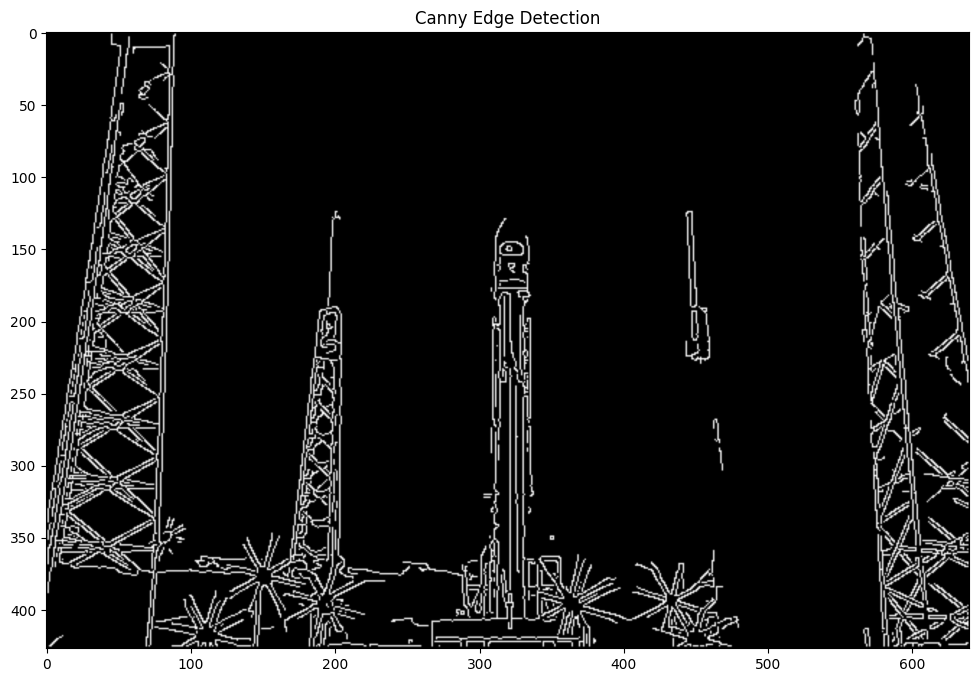

In [ ]:
# Apply Canny edge detection
edges = canny(rocket_wh)
# check https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html
plt.imshow(edges, interpolation='gaussian', cmap='gray')
plt.title('Canny Edge Detection')

## Step 3: Fill Regions
We will fill the regions detected by the Canny edge detector.

Text(0.5, 1.0, 'Region Filling')

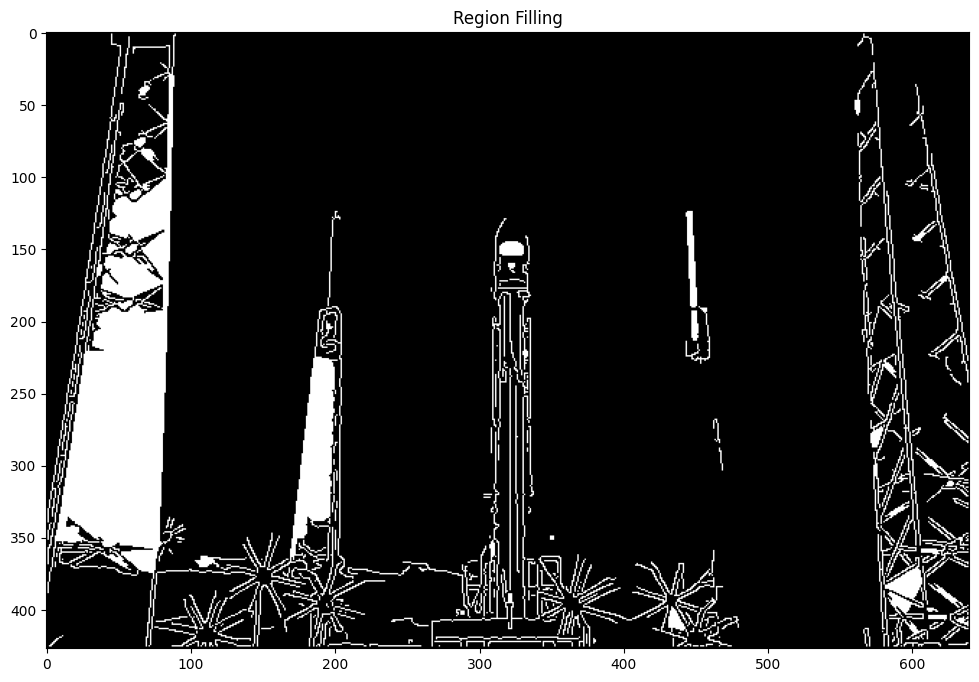

In [ ]:
# Fill regions on edges img
fill_im = nd.binary_fill_holes(edges)
plt.imshow(fill_im, cmap='gray')
plt.title('Region Filling')

## Step 4: Create Elevation Map for Region Segmentation
Now we'll create an elevation map of the grayscale image to aid in region segmentation.

An elevation map shows the various elevations in a region. Elevation in maps is shown using contour lines (level curves), bands of the same color (using imagery processing), or by numerical values giving the exact elevation details. Elevation maps are generally known as Topographical Maps by using Deep Learning.

The choice of the elevation map is critical for good segmentation. Here, the amplitude of the gradient provides a good elevation map. We use the Sobel operator for computing the amplitude of the gradient.

Text(0.5, 1.0, 'Elevation Map')

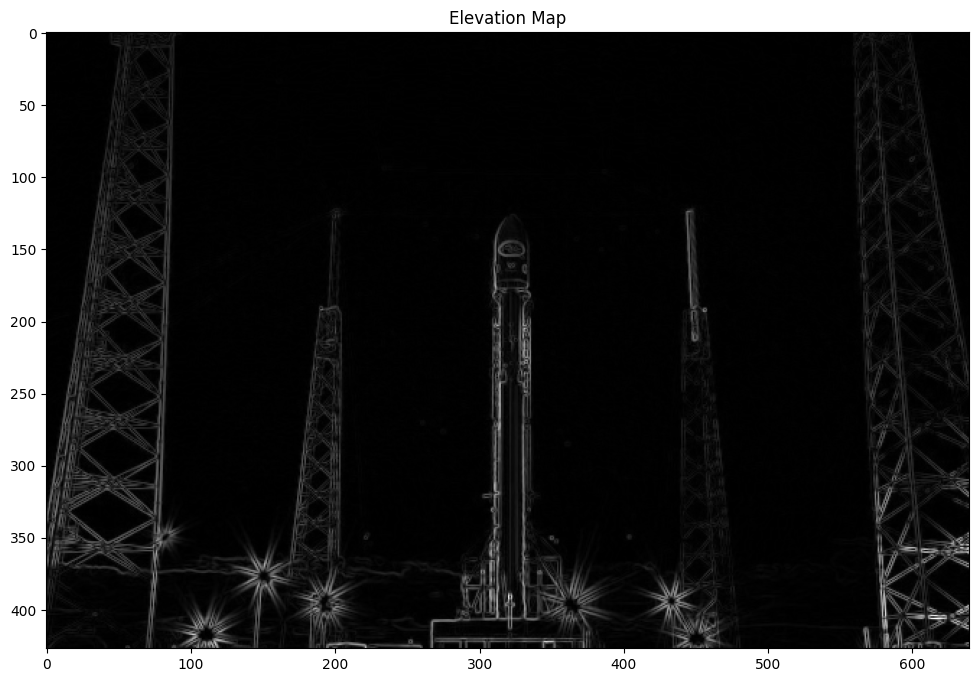

In [ ]:
# Create elevation map
elevation_map = sobel(rocket_wh)
plt.imshow(elevation_map, cmap='gray')
plt.title('Elevation Map')

## Step 5: Apply Markers befor Watershed Segmentation
We'll apply markers to the image and then use the Watershed algorithm for segmentation.

Watershed Segmentation is a region-based method in computer science that treats an image as a topographic landscape, separating it into catchment basins based on pixel values or gradients, and is commonly used in medical image segmentation tasks.

Text(0.5, 1.0, 'Markers')

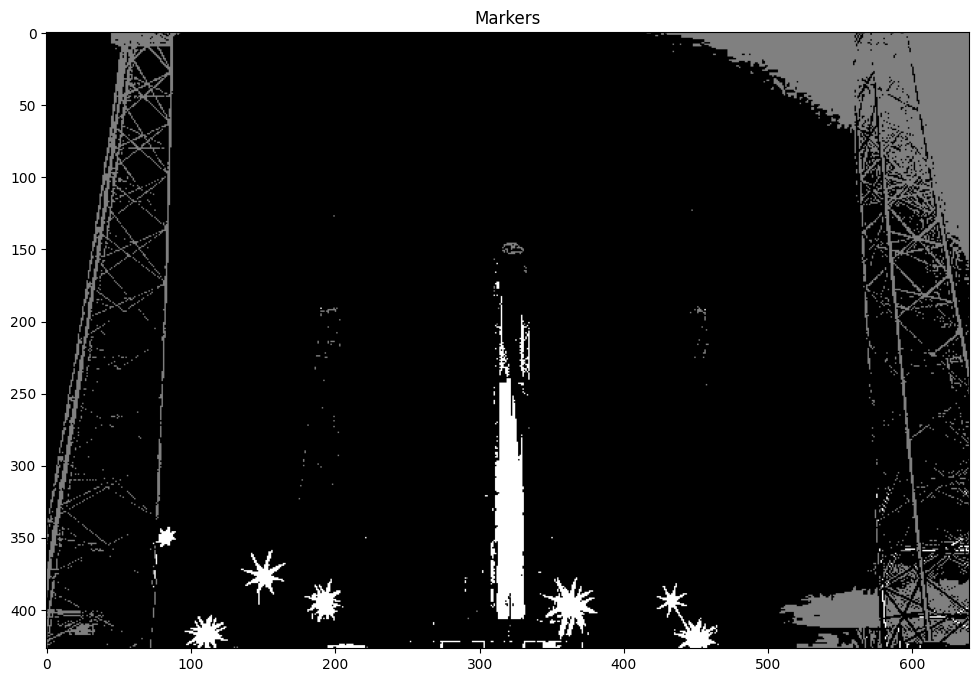

In [ ]:
# Apply markers
#Return an array of zeros with the same shape and type as a given array.
markers = np.zeros_like(rocket_wh)
markers[rocket_wh < 0.1171875] = 1  # 30/255
markers[rocket_wh > 0.5859375] = 2  # 150/255
plt.imshow(markers, cmap='gray')
plt.title('Markers')

## Step 6: Perform Watershed Segmentation
Now we'll perform the actual Watershed segmentation.

Text(0.5, 1.0, 'Watershed Segmentation')

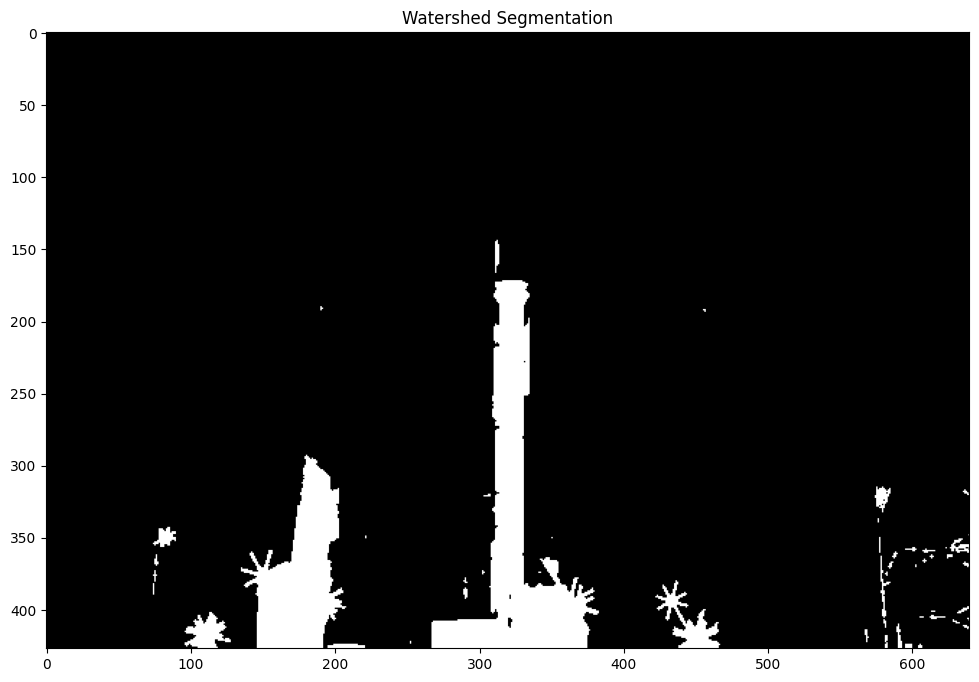

In [ ]:
from skimage.segmentation import watershed

# Ensure markers is an integer array
markers = np.zeros_like(rocket_wh, dtype=np.int32)
markers[rocket_wh < 0.1171875] = 1  # 30/255
markers[rocket_wh > 0.5859375] = 2  # 150/255

# Perform watershed region segmentation
segmentation = watershed(elevation_map, markers)
plt.imshow(segmentation, cmap='gray')
plt.title('Watershed Segmentation')


## Step 7: Overlay and Contour Plotting
Finally, we'll overlay the segmented regions onto the original image and plot the contours.

A contour plot is a graphical method to visualize the 3-D surface by plotting constant Z slices called contours in a 2-D format.

The contour plot is formed by:

Vertical axis: Independent variable 2
Horizontal axis: Independent variable 1
Lines: iso-response values, can be calculated with the help (x,y).

To perform overlay and contour plotting on an image, you need to do:

1. Image Segmentation:

segmentation = nd.binary_fill_holes(segmentation - 1):
This line assumes nd is a library for image processing (likely Scikit-image).
It performs two operations:
segmentation - 1: Subtracts 1 from the existing segmentation data. This might be to adjust background values.
nd.binary_fill_holes( ... ): This function fills any holes present in the binary segmentation data. Holes are isolated regions with a different value than the surrounding area.
label_rock, _ = nd.label(segmentation):
This line utilizes the same nd library (likely Scikit-image).
nd.label(segmentation) identifies connected components (objects) in the binary image and assigns a unique label to each object.
The code assigns the labels to label_rock and discards any secondary output using _.
2. Overlay Creation:

image_label_overlay = label2rgb(label_rock, image=rocket_wh):
assumes label2rgb is a function (likely custom or from another library) that converts the labeled image (label_rock) into a color RGB image.
The additional argument image=rocket_wh suggests it might use the original image (rocket_wh) to assign colors based on labels.
3. Overlay Plotting:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 16), sharey=True):
This line uses matplotlib.pyplot (imported as plt) to create a figure (fig) with two subplots (ax1 and ax2) arranged in a single row (1) with two columns (2).
figsize=(24, 16) sets the figure size to be 24 inches wide and 16 inches tall.
sharey=True ensures both subplots share the same y-axis.
ax1.imshow(rocket_wh, cmap='gray'):
This line displays the original grayscale image (rocket_wh) on the first subplot (ax1).
cmap='gray' specifies a grayscale colormap for the image.
ax1.contour(segmentation, [0.8], linewidths=1.8, colors='w'):
This line overlays a contour plot on top of the image in subplot ax1.
contour(segmentation, [0.8]) defines the contour to be drawn at a specific intensity level (0.8 in this case).
linewidths=1.8 sets the line width of the contour to 1.8 for better visibility.
colors='w' sets the color of the contour to white.
ax2.imshow(image_label_overlay):
This line displays the colored labeled overlay (image_label_overlay) on the second subplot (ax2).
plt.show():
This line displays the generated figure containing both the original image with contour and the colored labeled image.

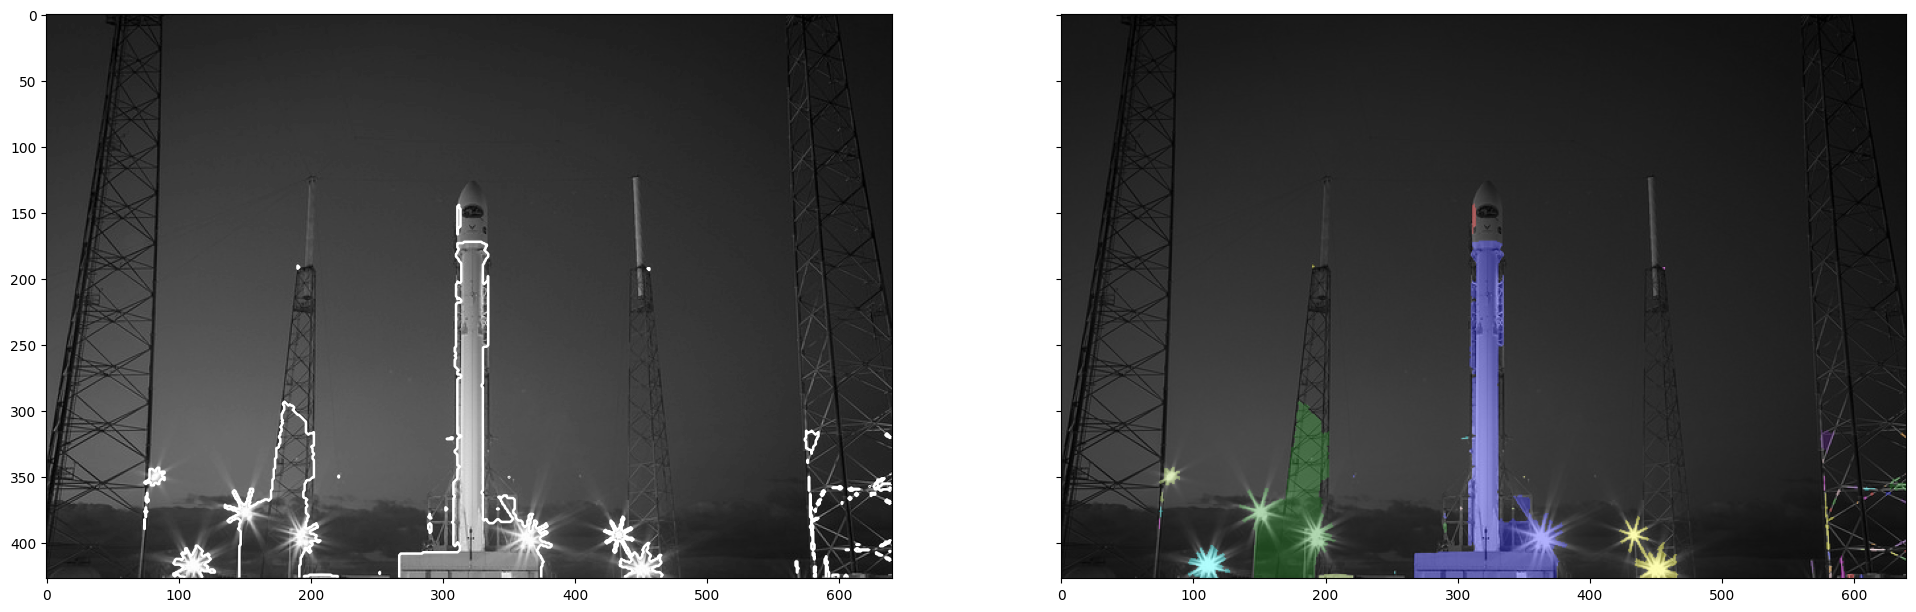

In [ ]:
# Overlay and contour plotting
segmentation = nd.binary_fill_holes(segmentation - 1)
label_rock, _ = nd.label(segmentation)
image_label_overlay = label2rgb(label_rock, image=rocket_wh)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 16), sharey=True)
ax1.imshow(rocket_wh, cmap='gray')
ax1.contour(segmentation, [0.8], linewidths=1.8, colors='w')
ax2.imshow(image_label_overlay)
plt.show()

## Conclusion
In this notebook, we performed various image processing tasks, including edge detection, region filling, and segmentation using the Watershed algorithm. These techniques are essential in computer vision tasks for identifying and analyzing different regions within an image.